In [2]:
import pandas as pd

data = pd.read_csv("train_data_50_main.csv")

data['Date'] = pd.to_datetime(data['Date'])

# set indexes 
data.set_index(["Ticker", "Date"], inplace=True)

print(data.head())

                       Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
ZJ     2015-07-06  5.699535  5.758382  5.695429  5.747890   5.193889   
       2015-07-07  5.742872  5.754733  5.646161  5.733748   5.181111   
       2015-07-08  5.678550  5.685849  5.590051  5.591420   5.052501   
       2015-07-09  5.649811  5.659391  5.438599  5.477374   4.949447   
       2015-07-10  5.562680  5.649811  5.529379  5.623808   5.081768   

                      Volume  
Ticker Date                   
ZJ     2015-07-06  112241600  
       2015-07-07  187787200  
       2015-07-08  243046400  
       2015-07-09  314380000  
       2015-07-10  245418000  


In [3]:
# Get the tickers
tickers = data.index.get_level_values("Ticker").unique()

# Print the sorted tickers
tickers = sorted(tickers)

tick_count = 0
corrs = []
ticker1 = []
ticker2 = []
# Want to analyze the stocks that move together or not together
for i in range(tick_count, len(tickers) - 1):
    for j in range(i + 1, len(tickers)):
        percent_change_a = (data.loc[tickers[i]]["Close"] - data.loc[tickers[i]]["Open"])/data.loc[tickers[i]]["Open"]
        a_series = pd.Series(percent_change_a)
        percent_change_b = (data.loc[tickers[j]]["Close"] - data.loc[tickers[j]]["Open"])/data.loc[tickers[j]]["Open"]
        b_series = pd.Series(percent_change_b)
        # ------FOR DEBUG PRUPOSES------
        # print(f"A_SERIES: \n{a_series}")
        # print(f"B_SERIES: \n{b_series}")
        # print(f"{tickers[i]} and {tickers[j]}: {a_series.corr(b_series)}")
        corr = a_series.corr(b_series)
        corrs.append(corr)
        ticker1.append(tickers[i])
        ticker2.append(tickers[j])

correlations = pd.DataFrame({"Ticker1": ticker1, "Ticker2": ticker2, "Correlation": corrs})
print(correlations)
correlations



     Ticker1 Ticker2  Correlation
0          A       B     0.432408
1          A       C     0.370245
2          A       D     0.452107
3          A       E     0.538456
4          A       F     0.412770
...      ...     ...          ...
1220      ZU      ZW     0.311492
1221      ZU      ZX     0.333727
1222      ZV      ZW     0.632423
1223      ZV      ZX     0.426293
1224      ZW      ZX     0.505043

[1225 rows x 3 columns]


,Ticker1,Ticker2,Correlation
0,A,B,0.432408
1,A,C,0.370245
2,A,D,0.452107
3,A,E,0.538456
4,A,F,0.412770
...,...,...,...
1220,ZU,ZW,0.311492
1221,ZU,ZX,0.333727
1222,ZV,ZW,0.632423
1223,ZV,ZX,0.426293


In [4]:
#SPX highest correlation - ZO, V, P, J, 
#DJI highest correlation - ZB


In [5]:
# Sort entire correlations df by the correlation values
correlations = correlations.sort_values(by="Correlation", ascending=False)
print(correlations)

# Capture the least and most correlated tickers
top_correlated_tickers = correlations.iloc[:6]
least_correlated_tickers = correlations.iloc[len(correlations.index) - 6:len(correlations.index)]

top_correlated_tickers = top_correlated_tickers.reset_index(drop=True)

print(least_correlated_tickers)

print(top_correlated_tickers)


     Ticker1 Ticker2  Correlation
410        J       P     0.985502
84         B      ZL     0.855175
23         A       Y     0.848811
1013      ZC      ZW     0.746992
960       ZA      ZM     0.738727
...      ...     ...          ...
1140      ZK      ZR     0.078172
1047      ZE      ZR     0.076998
867        W      ZR     0.064146
1098      ZH      ZR     0.059673
1206      ZR      ZU     0.045672

[1225 rows x 3 columns]
     Ticker1 Ticker2  Correlation
372        I       R     0.081277
1140      ZK      ZR     0.078172
1047      ZE      ZR     0.076998
867        W      ZR     0.064146
1098      ZH      ZR     0.059673
1206      ZR      ZU     0.045672
  Ticker1 Ticker2  Correlation
0       J       P     0.985502
1       B      ZL     0.855175
2       A       Y     0.848811
3      ZC      ZW     0.746992
4      ZA      ZM     0.738727
5       U      ZL     0.727735


In [6]:
import numpy as np

open_prices = []

for ticker in tickers:
    stock_close_data = data.loc[ticker]["Open"]
    open_prices.append(stock_close_data.values)

open_prices = np.stack(open_prices)

trades = np.zeros_like(open_prices)

print(open_prices[0][0])

17.042949946719865


In [7]:

min_change_percent = 0.05

tickers_to_idx = {k: v for v, k in enumerate(tickers)}

# on day 1 ---- buy the stocks that are best correlated with the S&P and Dow Jones Index
trades[tickers_to_idx["ZB"]][1] = int((0.2 * 25000) / (data["Open"]["ZB"][0]))
trades[tickers_to_idx["ZO"]][1] = int((0.15 * 25000) / (data["Open"]["ZO"][0]))

# rom indices_correlations import top
# op correlated stock have diverged in movement

for day in range(1, len(open_prices[0])-1):
    for idx in range(len(top_correlated_tickers) - 1):
        ticker1 = tickers_to_idx[top_correlated_tickers["Ticker1"][idx]]
        ticker2 = tickers_to_idx[top_correlated_tickers["Ticker2"][idx]]
        ticker1_pct_change = (open_prices[ticker1][day] - open_prices[ticker1][day-1]) / open_prices[ticker1][day-1]
        ticker2_pct_change = (open_prices[ticker2][day] - open_prices[ticker2][day-1]) / open_prices[ticker2][day-1]
        
        # After that, determine from the dataframe which stock had a higher percent change
        # lets say A and B are correlated, if A goes up more than B goes down above a certain constant (e), buy A; if A goes up smaller than B went down, short A
        if ticker1_pct_change > 0 and ticker2_pct_change < 0 and ((ticker1_pct_change - abs(ticker2_pct_change)) > min_change_percent):
            # buy ticker 2
            trades[tickers_to_idx[top_correlated_tickers["Ticker2"][idx]]][day] = 1
        elif ticker1_pct_change < 0 and ticker2_pct_change > 0 and ((ticker2_pct_change - (abs(ticker1_pct_change))) > min_change_percent):
            # buy ticker 1
            trades[tickers_to_idx[top_correlated_tickers["Ticker1"][idx]]][day] = 1
        elif ticker1_pct_change > 0 and ticker2_pct_change < 0 and (ticker1_pct_change < (abs(ticker2_pct_change) - min_change_percent)):
            # short ticker 1
            trades[tickers_to_idx[top_correlated_tickers["Ticker1"][idx]]][day] = -1
        elif ticker1_pct_change < 0 and ticker2_pct_change > 0 and (ticker2_pct_change < (abs(ticker1_pct_change) - min_change_percent)):
            # short ticker 2
            trades[tickers_to_idx[top_correlated_tickers["Ticker2"][idx]]][day] = -1
    


In [8]:
trades

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
from eval_algo import eval_actions

portfolio_value, sharpe_ratio = eval_actions(trades, open_prices, cash=25000, verbose=True)
print(f"\nPortfolio value: {portfolio_value}")
print(f"Sharpe ratio: {sharpe_ratio}")

final portfolio value: 42072.15935670904
cash: 16193.50610459024
positions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 283.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 399.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0]
short position info: defaultdict(<class 'list'>, {})
short value: 0

Portfolio value: [25000, 25000, 24929.086001974283, 24903.340345466917, 24805.55085804863, 24891.671558287406, 24924.21246900974, 24930.287016500926, 24988.366555489374, 24974.553872855042, 25143.278618612105, 25084.04210665378, 24925.593590261484, 25009.161325962417, 25025.725974203327, 24802.40266460762, 24856.522717220945, 24971.870108283525, 25002.775140830465, 25096.724168442513, 25038.45049953979, 25030.961913264047, 25064.265935091258, 25126.359591447545, 25051.757414619085, 25266.11425904864, 25198.410937217508, 25059.751884694913, 25115.1123756096, 25100.537706732586, 25091.974255466157, 25103.041027677205, 25065.722100521754, 24888.55180520495, 24656.21363004534, 24045.2976

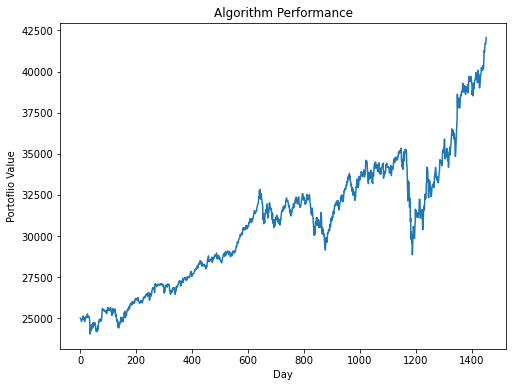

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

plt.plot(portfolio_value, label=f'{ticker}')

plt.xlabel('Day')
plt.ylabel('Portoflio Value')
plt.title('Algorithm Performance')
plt.show()